In [176]:
import pandas as pd
import numpy as np
import datetime as dt
import math as m

In [177]:
data = pd.read_csv('nifty_monthly_data.csv')
data.set_index("Date")
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900
166,2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200
167,2022-12-01,18871.949219,18887.599609,17779.500000,17806.800781,17806.800781,3683600
168,2022-12-23,17977.650391,18050.449219,17779.500000,17806.800781,17806.800781,0


In [178]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [179]:
data.shape

(169, 7)

In [180]:
df = data[:-2]
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
162,2022-07-01,15703.700195,17172.800781,15511.049805,17158.250000,17158.250000,5475300
163,2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900
166,2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200


In [181]:
df.shape

(167, 7)

In [182]:
df['return'] = df['Close'].pct_change()
df

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\360322641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = df['Close'].pct_change()


,Date,Open,High,Low,Close,Adj Close,Volume,return
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660
...,...,...,...,...,...,...,...,...
162,2022-07-01,15703.700195,17172.800781,15511.049805,17158.250000,17158.250000,5475300,0.087324
163,2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500,0.035030
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300,-0.037442
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900,0.053693


In [183]:
import seaborn as sns

<AxesSubplot:xlabel='return', ylabel='Count'>

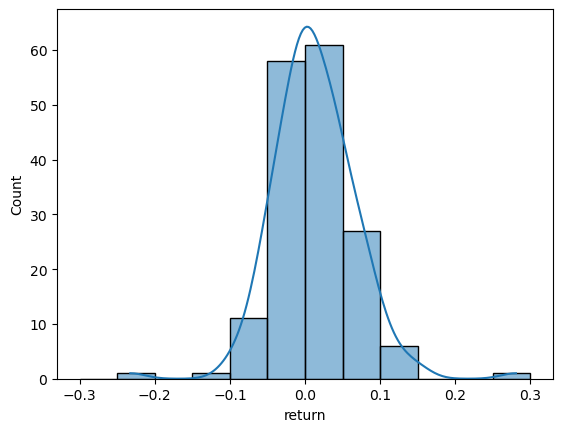

In [184]:
sns.histplot(data=df["return"],binwidth=0.05, binrange=(-0.3, 0.3), stat='count', kde=True)

In [185]:
df['return'].describe()

count    166.000000
mean       0.012878
std        0.055614
min       -0.232464
25%       -0.018939
50%        0.008573
75%        0.044250
max        0.280660
Name: return, dtype: float64

In [186]:
returns = df[1:]['return']
returns

1     -0.038664
2      0.093102
3      0.149953
4      0.280660
5     -0.035480
         ...   
162    0.087324
163    0.035030
164   -0.037442
165    0.053693
166    0.041425
Name: return, Length: 166, dtype: float64

In [187]:
losing_streaks = []

losing_streak = []
for ret in returns:
    ret = round(float(ret), 2)
    # print(ret)
    if ret < 0:
        losing_streak.append(ret*100)
    else:
        if len(losing_streak) >1:
            losing_streaks.append(losing_streak)
        losing_streak = []
print(f"Nifty losing streaks on monthly basis since 2009:")
losing_streaks

Nifty losing streaks on monthly basis since 2009:


[[-10.0, -3.0],
 [-1.0, -5.0],
 [-3.0, -9.0, -1.0],
 [-9.0, -4.0],
 [-2.0, -1.0, -6.0],
 [-2.0, -2.0, -5.0],
 [-4.0, -4.0],
 [-5.0, -8.0],
 [-2.0, -1.0],
 [-5.0, -4.0],
 [-6.0, -5.0],
 [-1.0, -6.0, -1.0],
 [-2.0, -6.0, -23.0],
 [-2.0, -3.0, -5.0]]

In [188]:
winning_streaks = []

winning_streak = []
for ret in returns:
    ret = round(float(ret*100), 2)
    # print(ret)
    if ret > 0:
        winning_streak.append(ret)
    else:
        if len(winning_streak) > 1: 
            winning_streaks.append(winning_streak)
        winning_streak = []
print(f"Nifty winning streaks on monthly basis since 2009:")
winning_streaks

Nifty winning streaks on monthly basis since 2009:


[[9.31, 15.0, 28.07],
 [8.05, 0.55, 9.05],
 [6.81, 3.35],
 [0.82, 6.64, 0.55],
 [4.45, 1.04, 0.65, 11.62],
 [12.43, 3.58],
 [0.56, 8.46],
 [4.63, 0.43, 2.2],
 [4.36, 0.94],
 [4.82, 9.83],
 [3.08, 6.81],
 [7.97, 5.28, 1.44, 3.02, 0.13, 4.49, 3.2],
 [6.35, 0.41],
 [10.75, 1.44, 3.95, 1.56, 4.23, 1.71],
 [4.59, 3.72, 3.31, 1.42, 3.41],
 [2.97, 4.72],
 [5.99, 2.85],
 [7.7, 1.07, 1.49],
 [4.09, 3.51, 1.5, 0.93],
 [7.53, 7.49, 2.84],
 [3.51, 11.39, 7.81],
 [6.56, 1.11],
 [6.5, 0.89, 0.26, 8.69, 2.84, 0.3],
 [8.73, 3.5]]

`Average returns on monthly ITM call`  

In [189]:
itm_call_df = df
itm_call_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,return
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660


In [190]:
itm_call_df.shape

(167, 8)

In [191]:
itm_call_df["points_gained"] = itm_call_df["Close"].diff()
itm_call_df.head(10)

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\220690599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["points_gained"] = itm_call_df["Close"].diff()


,Date,Open,High,Low,Close,Adj Close,Volume,return,points_gained
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664,-111.150147
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102,257.300049
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953,453.000000
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660,975.000244
5,2009-06-01,4450.399902,4693.200195,4143.250000,4291.100098,4291.100098,0,-0.035480,-157.850097
6,2009-07-01,4292.299805,4669.750000,3918.750000,4636.450195,4636.450195,0,0.080481,345.350097
7,2009-08-01,4633.799805,4743.750000,4353.450195,4662.100098,4662.100098,0,0.005532,25.649903
8,2009-09-01,4662.200195,5087.600098,4576.600098,5083.950195,5083.950195,0,0.090485,421.850097
9,2009-10-01,5087.200195,5181.950195,4687.500000,4711.700195,4711.700195,0,-0.073221,-372.250000


In [192]:
itm_call_df["call_price"] = itm_call_df["Close"] * 0.066
cp = itm_call_df["call_price"].shift(periods=1)
cp.head()

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\202879891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["call_price"] = itm_call_df["Close"] * 0.066


0           NaN
1    189.736803
2    182.400894
3    199.382697
4    229.280697
Name: call_price, dtype: float64

In [193]:
itm_call_df["call_price"] = cp
itm_call_df.head()

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\358166551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["call_price"] = cp


,Date,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN,NaN,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664,-111.150147,189.736803
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102,257.300049,182.400894
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953,453.000000,199.382697
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660,975.000244,229.280697


In [194]:
itm_call_df["max_loss"] = itm_call_df["call_price"] * 50 * (-1)
itm_call_df.head()

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\2784610436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["max_loss"] = itm_call_df["call_price"] * 50 * (-1)


,Date,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price,max_loss
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN,NaN,NaN,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664,-111.150147,189.736803,-9486.840162
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102,257.300049,182.400894,-9120.044677
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953,453.000000,199.382697,-9969.134838
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660,975.000244,229.280697,-11464.034838


In [195]:
delta = 0.9
gamma = 0.0002
itm_call_df['price_for_points'] = itm_call_df["points_gained"] * delta * 50 * 0.90
itm_call_df.tail(10)

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\520889545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df['price_for_points'] = itm_call_df["points_gained"] * delta * 50 * 0.90


,Date,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price,max_loss,price_for_points
157,2022-02-01,17529.449219,17794.599609,16203.250000,16793.900391,16793.900391,5620100,-0.031485,-545.949218,1144.430074,-57221.503710,-22110.943329
158,2022-03-01,16593.099609,17559.800781,15671.450195,17464.750000,17464.750000,7959500,0.039946,670.849609,1108.397426,-55419.871290,27169.409165
159,2022-04-01,17436.900391,18114.650391,16824.699219,17102.550781,17102.550781,5658100,-0.020739,-362.199219,1152.673500,-57633.675000,-14669.068369
160,2022-05-01,16924.449219,17132.849609,15735.750000,16584.550781,16584.550781,6343200,-0.030288,-518.000000,1128.768352,-56438.417577,-20979.000000
161,2022-06-01,16594.400391,16793.849609,15183.400391,15780.250000,15780.250000,5514100,-0.048497,-804.300781,1094.580352,-54729.017577,-32574.181631
162,2022-07-01,15703.700195,17172.800781,15511.049805,17158.250000,17158.250000,5475300,0.087324,1378.000000,1041.496500,-52074.825000,55809.000000
163,2022-08-01,17243.199219,17992.199219,17154.800781,17759.300781,17759.300781,5589500,0.035030,601.050781,1132.444500,-56622.225000,24342.556631
164,2022-09-01,17485.699219,18096.150391,16747.699219,17094.349609,17094.349609,6896300,-0.037442,-664.951172,1172.113852,-58605.692577,-26930.522466
165,2022-10-01,17102.099609,18022.800781,16855.550781,18012.199219,18012.199219,4539900,0.053693,917.849610,1128.227074,-56411.353710,37172.909205
166,2022-11-01,18130.699219,18816.050781,17959.199219,18758.349609,18758.349609,5257200,0.041425,746.150390,1188.805148,-59440.257423,30219.090795


In [196]:
itm_call_df["profit"] = itm_call_df[["max_loss", "price_for_points"]].max(axis=1)
itm_call_df.head()

C:\Users\ganes\AppData\Local\Temp\ipykernel_16496\3854232310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itm_call_df["profit"] = itm_call_df[["max_loss", "price_for_points"]].max(axis=1)


,Date,Open,High,Low,Close,Adj Close,Volume,return,points_gained,call_price,max_loss,price_for_points,profit
0,2009-01-01,2963.300049,3147.199951,2661.649902,2874.800049,2874.800049,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-02-01,2872.350098,2969.750000,2677.550049,2763.649902,2763.649902,0,-0.038664,-111.150147,189.736803,-9486.840162,-4501.580953,-4501.580953
2,2009-03-01,2764.600098,3123.350098,2539.449951,3020.949951,3020.949951,0,0.093102,257.300049,182.400894,-9120.044677,10420.651984,10420.651984
3,2009-04-01,3023.850098,3517.250000,2965.699951,3473.949951,3473.949951,0,0.149953,453.000000,199.382697,-9969.134838,18346.500000,18346.500000
4,2009-05-01,3478.699951,4509.399902,3478.699951,4448.950195,4448.950195,0,0.280660,975.000244,229.280697,-11464.034838,39487.509882,39487.509882


In [197]:
itm_call_df["profit"].describe()

count      166.000000
mean      4342.384595
std      17384.561573
min     -36965.775000
25%      -5783.401974
50%       2199.151984
75%      14323.834523
max      55809.000000
Name: profit, dtype: float64

In [198]:
itm_call_df.to_csv("itm_monthly_call_strategy_nifty.csv")

`Calculate net profit (approx.)`  

In [199]:
sum(itm_call_df["profit"][1:])

720835.8426921001

`Filter by date `  

In [208]:
from_date = "2017-12-01"
selected_df = itm_call_df[(itm_call_df['Date'] > from_date)]
sum(selected_df["profit"])


401716.026267

`Median call price`  

In [209]:
import statistics
statistics.median(selected_df["call_price"]) * 50

38903.20370970001

`Cumulative profits`  

In [212]:
cum_profits["Date"] = selected_df["Date"]
cum_profits["cum_profit"] = selected_df["profit"].cumsum()
cum_profits.head(10)

132    -8357.198733
133   -39151.357897
134   -76117.132897
135   -25000.042062
136   -36323.865795
137    -7090.973733
138       24148.725
139    36867.742103
140    31199.759205
141    47191.207938
Name: profit, dtype: object